DATA VISUALISATION OF THE ANALYSIS

In [88]:
#importing neccessary modules
import pandas as pd
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

#conecting to this local server MSQLSERVER DATABASE
engine = create_engine("mssql+pyodbc://DESKTOP-G155H7U\MSSQLSERVER01/practise?driver=ODBC+Driver+17+for+SQL+Server")

#the table for the law of demand
Lod = pd.read_sql_query(""" 
SELECT * 
FROM ordersdetails$ o
INNER JOIN products$ p
ON o.ProductID=p.ProductID """, engine)
Lod.head()

,OrderDetailID,OrderID,ProductID,Quantity,ProductID,ProductName,SuppliersID,CategoryID,Unit,Price
0,1.0,10248.0,11.0,12.0,11.0,Queso Cabrales,5.0,4.0,1 kg pkg.,21.00
1,2.0,10248.0,42.0,10.0,42.0,Singaporean Hokkien Fried Mee,20.0,5.0,32 - 1 kg pkgs.,14.00
2,3.0,10248.0,72.0,5.0,72.0,Mozzarella di Giovanni,14.0,4.0,24 - 200 g pkgs.,34.80
3,4.0,10249.0,14.0,9.0,14.0,Tofu,6.0,7.0,40 - 100 g pkgs.,23.25
4,5.0,10249.0,51.0,40.0,51.0,Manjimup Dried Apples,24.0,7.0,50 - 300 g pkgs.,53.00


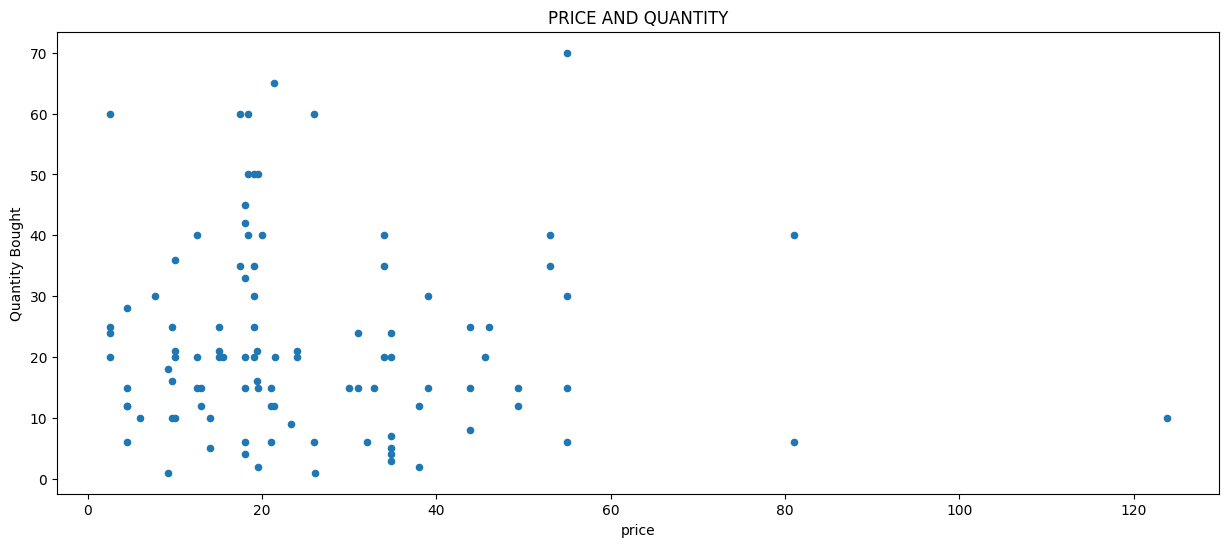

In [157]:
#scatter plot to visualize if these orders follows the law of demand
fig, ax = plt.subplots(figsize=(15, 6))
Lod[:100].plot(kind="scatter", x="Price", y="Quantity", xlabel="price", ylabel="Quantity Bought", title="PRICE AND QUANTITY", ax=ax);
plt.savefig("lod.png", dpi=150)

In [91]:
#Categerioes of product revenues
Csr = pd.read_sql_query(""" 
SELECT c.CategoryName,
SUM(p.price * o.quantity) as total_revenue
FROM ordersdetails$ o
INNER JOIN products$ p
ON o.ProductID=p.ProductID
INNER JOIN categories$ c
ON p.CategoryID=c.CategoryID
GROUP BY c.CategoryName
""", engine)
Csr.head()

,CategoryName,total_revenue
0,Beverages,19167.50
1,Condiments,7643.85
2,Confections,22869.10
3,Dairy Products,23589.90
4,Grains/Cereals,3111.75


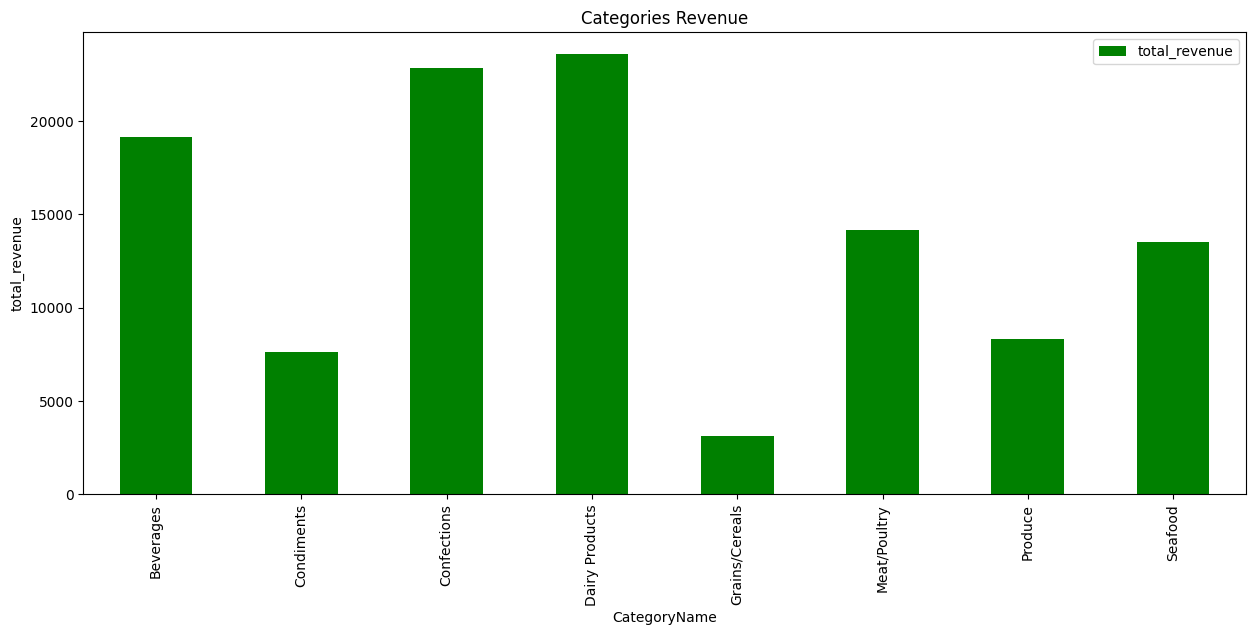

In [161]:
#the visualisation
fig, ax = plt.subplots(figsize=(15, 6))
Csr.plot(kind="bar", x="CategoryName", y="total_revenue", color='Green', ylabel="total_revenue", title="Categories Revenue", ax=ax);
plt.savefig("Categories", dpi=150)

In [93]:
#top 10 product that is ordered
notepo = pd.read_sql_query(""" 
SELECT TOP (10)p.ProductName, p.price, COUNT(p.ProductName) as no_of_times_each_productOrdered
FROM ordersdetails$ o
INNER JOIN products$ p
ON o.ProductID=p.ProductID
GROUP BY p.ProductName,p.price ORDER BY no_of_times_each_productOrdered DESC
""", engine)
notepo.head()

,ProductName,price,no_of_times_each_productOrdered
0,Tarte au sucre,49.30,8
1,Mozzarella di Giovanni,34.80,7
2,Raclette Courdavault,55.00,7
3,Guaraná Fantástica,4.50,6
4,Pavlova,17.45,6


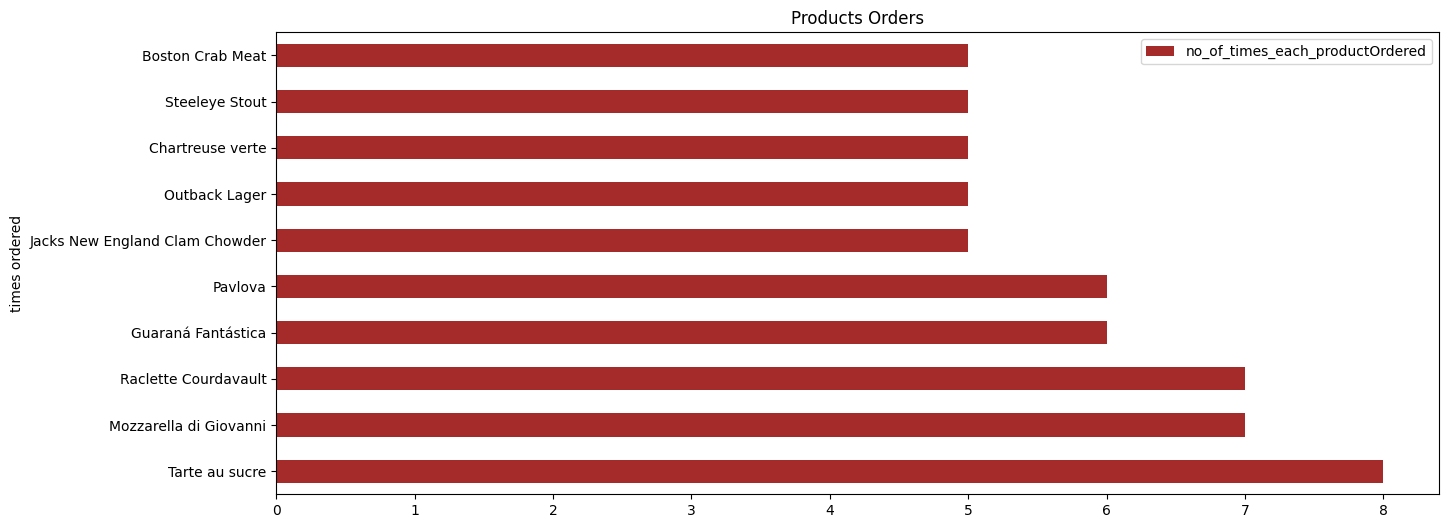

In [163]:
#creating the horizontal bar chat
fig, ax = plt.subplots(figsize=(15, 6))
notepo.plot(kind="barh", x="ProductName", y="no_of_times_each_productOrdered", ylabel="times ordered", title="Products Orders", color='brown', ax=ax)
plt.savefig("products.png", dpi=150)

In [134]:
#no of customers from each city
copc = pd.read_sql_query(""" 
SELECT City, COUNT(City) as no_of_customers_from_each_city
FROM customers$
GROUP BY City ORDER BY no_of_customers_from_each_city DESC
""", engine)
copc.head(10)

,City,no_of_customers_from_each_city
0,London,6
1,México D.F.,5
2,São Paulo,4
3,Rio de Janeiro,3
4,Madrid,3
5,Buenos Aires,3
6,Paris,2
7,Portland,2
8,Nantes,2
9,Lisboa,2


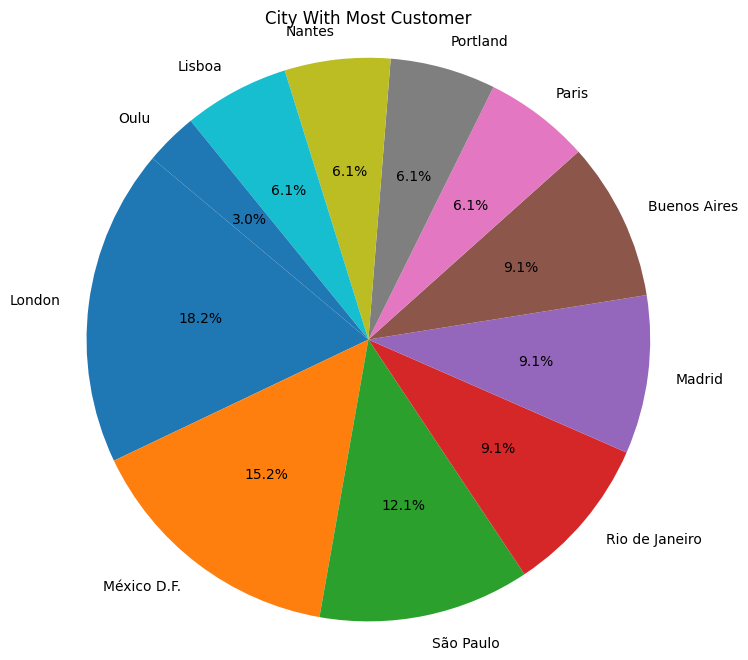

<Figure size 640x480 with 0 Axes>

In [138]:
#spelling out the variables we want to plot. For easy readibility, only the first 10 rows will be considered
data = copc["no_of_customers_from_each_city"][:11]
labels = copc["City"][:11]

# Create the pie chart
plt.figure(figsize=(8,8))
plt.pie(data, labels=labels, autopct="%1.1f%%", startangle=140)  # Add percents with one decimal

# labelling the pie chart
plt.title("City With Most Customer")
plt.axis('equal')  # Equal aspect ratio ensures a circular pie

# Display the chart
plt.show();
plt.savefig("products.png", dpi=150)

APPENDIX

In [ ]:
Lod - Law_of_Demand

Csr - categories_sales_revenue

notepo - no_of_times_each_ProductOrdered

copc - customers_per_city